# Task:
### Find out the mass (solar mass units) and radius (km) of the star using regular TOV code as well as enthalpy method. Compare the two in terms of code running time. They should both agree to better than a fraction of a % if you wrote the code right.

In [1]:

import pandas as pd
import numpy as np

import numpy as np
import math
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
df = pd.DataFrame()
pressure = pd.DataFrame()

In [3]:
#energy density(g/cm3)    pressure (dynes/cm2)   enthalpy (cm2/s2)    baryon number density (cm-3)  

In [4]:

# df = pd.read_table('eosA', delim_whitespace=True,\
#                    names=('energy density(g/cm^3)',\
#                           'pressure(dynes/cm^2)',\
#                           'enthalpy(cm^2/s^2)',\
#                          'baryon number density (1/cm^3)'))
# pressure = pd.read_table('eos1', sep=",",\
#                    names=('radius',\
#                           'mass',\
#                           'enthalpy(cm^2/s^2)'))

df = pd.read_table('eos1', sep=",",\
                   names=('radius',\
                          'mass',\
                          'enthalpy(cm^2/s^2)'))
pressure =  pd.read_table('datapoly',delim_whitespace=True, header=0)

In [5]:
data = df.copy(deep= True)
data

press_data = pressure.copy(deep=True)
#data_test = df_test.copy(deep = True)

In [6]:
data = data.iloc[1:]
data

,radius,mass,enthalpy(cm^2/s^2)
1,0.210148168809,0.000093,1.966730e-01
2,0.64043681799,0.001699,1.947063e-01
3,0.897187054013,0.004056,1.927396e-01
4,1.10010173363,0.007021,1.907728e-01
5,1.27419528308,0.010497,1.888061e-01
6,1.42949488221,0.014420,1.868394e-01
7,1.57125855491,0.018743,1.848726e-01
8,1.70266545416,0.023430,1.829059e-01
9,1.82581795937,0.028450,1.809392e-01
10,1.94219504966,0.033778,1.789725e-01


In [7]:
press_data = press_data.iloc[1:]
press_data

,Enthalpy,Pressure,(1\km^2),Energy,Density(1/km^2)
1,1.947063e-01,1.642263e-04,1.606132e-03,NaN,NaN
2,1.927396e-01,1.607646e-04,1.589114e-03,NaN,NaN
3,1.907728e-01,1.573432e-04,1.572113e-03,NaN,NaN
4,1.888061e-01,1.539618e-04,1.555129e-03,NaN,NaN
5,1.868394e-01,1.506205e-04,1.538161e-03,NaN,NaN
6,1.848726e-01,1.473190e-04,1.521210e-03,NaN,NaN
7,1.829059e-01,1.440573e-04,1.504276e-03,NaN,NaN
8,1.809392e-01,1.408353e-04,1.487359e-03,NaN,NaN
9,1.789725e-01,1.376529e-04,1.470458e-03,NaN,NaN
10,1.770057e-01,1.345099e-04,1.453573e-03,NaN,NaN


In [8]:
p_eosa = press_data['Pressure'].tolist()
p_eosa

[0.00016422626828468883,
 0.00016076459963751752,
 0.0001573431523682136,
 0.0001539618146021044,
 0.00015062047471661318,
 0.00014731902134073417,
 0.0001440573433545032,
 0.0001408353298884752,
 0.0001376528703232015,
 0.000134509854288703,
 0.0001314061716639532,
 0.000128341712576353,
 0.0001253163674012146,
 0.0001223300267612411,
 0.0001193825815260096,
 0.00011647392281145459,
 0.0001136039419793521,
 0.00011077253063680591,
 0.0001079795806357342,
 0.0001052249840723564,
 0.0001025086332866833,
 9.983042086200517e-05,
 9.71902396243846e-05,
 9.458798264214554e-05,
 9.202354322536967e-05,
 8.949681492538662e-05,
 8.70076915342725e-05,
 8.455606708434174e-05,
 8.214183584764847e-05,
 7.976489233548063e-05,
 7.74251312978617e-05,
 7.512244772304899e-05,
 7.285673683703572e-05,
 7.062789410305281e-05,
 6.843581522107083e-05,
 6.628039612730593e-05,
 6.416153299372335e-05,
 6.207912222754404e-05,
 6.0033060470751974e-05,
 5.8023244599601854e-05,
 5.6049571724127945e-05,
 5.411193918

In [9]:
# p_eosa[::-1] = p_eosa
# p_eosa

In [10]:
data = data.iloc[0:101]
data

,radius,mass,enthalpy(cm^2/s^2)
1,0.210148168809,0.000093,1.966730e-01
2,0.64043681799,0.001699,1.947063e-01
3,0.897187054013,0.004056,1.927396e-01
4,1.10010173363,0.007021,1.907728e-01
5,1.27419528308,0.010497,1.888061e-01
6,1.42949488221,0.014420,1.868394e-01
7,1.57125855491,0.018743,1.848726e-01
8,1.70266545416,0.023430,1.829059e-01
9,1.82581795937,0.028450,1.809392e-01
10,1.94219504966,0.033778,1.789725e-01


# Remember!

\begin{align}
\frac{dr^2(h)}{dh} = -\ 2r^2  \frac{r - 2m}{m + 4 \pi p r^3}\, \\
\frac{dm(h)}{dh} & = 4 \pi \varepsilon r^3 \frac{r - 2m}{m + 4 \pi p r^3} \\
r^2(h) = \frac{3(h_c - h)}{2 \pi (3p_c - \varepsilon)}  \\
m(h) & = \frac{4}{\pi} \varepsilon_c r^3
\end{align}

In [11]:
h_eosa = data['enthalpy(cm^2/s^2)'].tolist()
h_eosa[::-1] = h_eosa

#p_eosA = data['pressure(dynes/cm^2)'].tolist()
#e_eosA = data['energy density(g/cm^3)'].tolist()
#len(h_eosA)
#len(h_test)

In [12]:
h_array=np.array(data['enthalpy(cm^2/s^2)'],dtype=float)

h_array[::-1] = h_array
h_array

array([2.48932819e-16, 1.96673024e-03, 3.93346048e-03, 5.90019072e-03,
       7.86692096e-03, 9.83365120e-03, 1.18003814e-02, 1.37671117e-02,
       1.57338419e-02, 1.77005722e-02, 1.96673024e-02, 2.16340326e-02,
       2.36007629e-02, 2.55674931e-02, 2.75342233e-02, 2.95009536e-02,
       3.14676838e-02, 3.34344141e-02, 3.54011443e-02, 3.73678745e-02,
       3.93346048e-02, 4.13013350e-02, 4.32680653e-02, 4.52347955e-02,
       4.72015257e-02, 4.91682560e-02, 5.11349862e-02, 5.31017165e-02,
       5.50684467e-02, 5.70351769e-02, 5.90019072e-02, 6.09686374e-02,
       6.29353676e-02, 6.49020979e-02, 6.68688281e-02, 6.88355584e-02,
       7.08022886e-02, 7.27690188e-02, 7.47357491e-02, 7.67024793e-02,
       7.86692096e-02, 8.06359398e-02, 8.26026700e-02, 8.45694003e-02,
       8.65361305e-02, 8.85028608e-02, 9.04695910e-02, 9.24363212e-02,
       9.44030515e-02, 9.63697817e-02, 9.83365120e-02, 1.00303242e-01,
       1.02269972e-01, 1.04236703e-01, 1.06203433e-01, 1.08170163e-01,
      

In [13]:
def interpolate(stuff):
    new_list = []
    for i, enthalpy in enumerate(stuff[1:]):
        j=0
        while j < 1000:
            new_list.append(stuff[i]+((stuff[i+1] - stuff[i])/1000)*j) 
            j+=1
    return new_list

# h_eosa = interpolate(h_eosa1)
# p_eosa = interpolate(p_eosa1)
# e_eosa = interpolate(e_eosa1)


In [14]:
#RK4 Routine:

from math import pi
import numpy as np
"Uses the differential equations for y to calculate and step forward the functions."

class Step:
    
    "__init__ is needed in order to construct the object itself in order to give it attributes"

    def __init__(self, t, p, e, k, gam, y):

        self.t = t
        self.p = []
        self.e = []
        self.k = k
        self.gam = gam
        self.y = y
        self.f = np.zeros(2,dtype=float)

        self.k1 = np.zeros(2, dtype=float)
        self.k2 = np.zeros(2, dtype=float)
        self.k3 = np.zeros(2, dtype=float)
        self.k4 = np.zeros(2, dtype=float)
        self.dt=[]

        for j in np.arange(len(h_eosa)-1):
            self.dt.append(self.t[j]-self.t[j+1])
            self.e.append((np.exp(self.t[j]/self.gam)-1)/self.k)
            self.p.append(self.k*(self.e[j]**self.gam))
        self.dt.append(self.dt[-1]+(self.t[-1]-self.t[-2])) 

    def _deriv(self, t, y, i):
        r = np.sqrt(y[0]) #radius
        #self.e = ((np.exp(self.t[i]/self.gam)-1)/self.k) #energy density
        #self.p = self.k*(self.e[i]**self.gam) #pressure
        
#         for i in np.arange(len(h_eosa)):
#             h,e,p = (h_eosa[i],e_eosa[i],p_eosa[i])
        
        for j in np.arange(len(h_eosa)-1):
            self.dt.append(self.t[j]-self.t[j+1])
            self.e.append((np.exp(self.t[j]/self.gam)-1)/self.k)
            self.p.append(self.k*(self.e[j]**self.gam))
        self.dt.append(self.dt[-1]+(self.t[-1]-self.t[-2])) 
        
        Arg = (r-2.0*self.y[1])/(self.y[1]+4.0*np.pi*self.p[i]*r**1.5)
        
        self.f[0]=-2.0*self.y[0]*(self.y[0]**(0.5)-2.0*self.y[1])/(y[1]+4.0*np.pi*self.p[i]*self.y[0])
        
        self.f[1] = 2.00001*np.pi*self.e[i]*(r)*self.f[0]
        
        return self.f
    '''''
    Remember that single underscore means its weakly private which means it singals to the 
    code for this to not be used by external parts of the code.
    Strongly private methods and attributes have a double underscore at 
    the beginning of their names. This causes their names to be mangled, 
    which means that they can't be accessed from outside the class. 
    '''''
    def rk4step(self, j):

        self.k1 = self._deriv(
            self.t[j],
            self.y,
            j
            # self.k1
        )
        self.k2 = self._deriv(
            self.t[j] + self.dt[j] / 2.0,
            self.y + self.dt[j] / 2.0 * self.k1,
            j
            # self.k2
        )
        self.k3 = self._deriv(
            self.t[j] + self.dt[j] / 2.0,
            self.y + self.dt[j] / 2.0 * self.k2,
            j
            # self.k3
        )
        self.k4 = self._deriv(
            self.t[j] + self.dt[j],
            self.y + self.dt[j] * self.k3,
            j
            # self.k4
        )
        self.dy = self.dt[j] * (self.k1 + (2.0*self.k2  + 2.0*self.k3)  +self.k4)/6.0
        #self.t += self.dt[j]
        self.y += self.dy

        return self.y
    
    
    

In [15]:
#from rk4step import Step
import numpy as np
import math
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches



#variables
n =1
gam = 1+(1/n)
mass = 1.4                                      #Solar masses
mkm = 1.4762
kgkm = 7.42614*10**(-31)                        #kg to km 
radius = 10.0                                   # km
wn = 0.392699
nn = 0.63662                                    #dimensionless for n =1
k = nn*radius**2.0                                #km^2


#important constants at center of star:

pc = wn*mkm**2.0 *(mass**2.0)/(radius**4.0)           #central pressure 1/km^2
#pc = p_eosa[-1]
ec = (pc/k)**(1.0/gam) #central density 1/km^2
#ec = e_eosa[-1]
#hc = gam* np.log(1.0 + k*ec)  #central enthalpy for n = 1 polytrope 
hc = h_eosa[-1]



#small r approx:
rsq1 = 3.0*(hc - 0.99999*hc)/((2.0*np.pi)* (3.0*pc + ec))
msmallr1 = (4.0*np.pi* ec* rsq1**(1.5))/(3.0)          
# msmallr1 = (4.0* ec* rsq1**(1.5))/(np.pi*3.0) 

#starting enthalpy


h = hc

h_array=np.array(data['enthalpy(cm^2/s^2)'],dtype=float)
dh=[]

for i in np.arange(len(h_eosa)-1):
    dh.append((h_eosa[i]-h_eosa[i+1]))
    #(tVal,yVal)=myStep.rk4step()
    #t_out[iStep]=tVal
    #y_out[iStep]=yVal
dh.append(dh[-1]+(dh[-1]-dh[-2]))

In [16]:
print(pc,ec,hc)
print(rsq1, msmallr1)

0.00016772827043702574 0.001623166217292098 0.196673023904
0.00044162252853693917 6.309986564306223e-08


In [17]:
type(dh)

list

In [18]:
y = np.zeros(2, dtype=float)

y[0] = rsq1
y[1] = msmallr1

m_array = []
r_array = []


star = Step(h_eosa,pc,ec,k,gam, y)

    
    
with open('data_test.txt', 'w') as file:
    file.write('Radius     ')
    file.write('Mass   ')
    file.write('Enthalpy (cm^2/s^2)  ')
    file.write('\n')
    file.write(str(rsq1**0.5) + ',')
    file.write(str(msmallr1*mkm)+',')
    file.write(str(h_eosa[-1]))
    file.write('\n')


    r_array.append(y[0]**0.5)
    m_array.append(y[1]/mkm)
    #h_array.append(h)
    i=len(h_eosa)-1
    while i>0:
#        print(h, end='\r')
        y = star.rk4step(i)
#         print(i)
        i-=1
        m_array.append(y[1]/mkm)
        r_array.append(y[0]**0.5) 
        #h_array.append(h) #will not need this line for new code
        file.write(str(y[0]**0.5)+',')
        file.write(str(y[1]/mkm)+',')
        file.write(str(h_eosa[i]))
        file.write('\n')


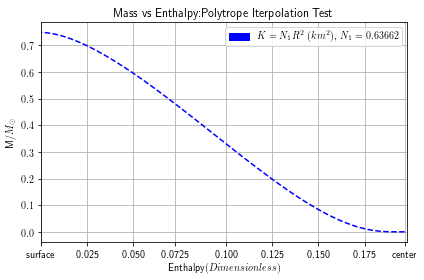

In [19]:
import matplotlib as mpl
mpl.rc('text', usetex = True)
plt.title("Mass vs Enthalpy:Polytrope Iterpolation Test",fontweight='bold')
plt.plot(h_eosa[::-1],m_array[:],'b--')
plt.xlabel(r'Enthalpy$(Dimensionless)$',fontweight='bold')
# plt.ylabel('Mass')
plt.xlim(-0.0,0.198)
ax = plt.gca()
plt.xticks([0.0,0.025,0.050,0.0725,0.100,0.125,0.150,0.175,0.19667302390403815],
          [r'surface','0.025','0.050','0.0725','0.100','0.125','0.150','0.175', r'center'])
plt.ylabel(r'M/$M_{\odot}$', fontweight ='bold')
blue_patch = mpatches.Patch(color='blue', label='$K=N_{1}R^2$ $(km^{2})$, $N_{1}=0.63662$')
plt.legend(handles=[blue_patch])
plt.tight_layout()
plt.grid(True)
plt.savefig("MvEtest.png")
plt.show()

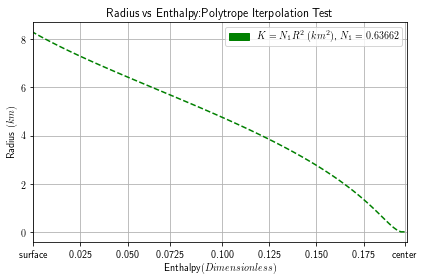

In [20]:
mpl.rc('text', usetex = True)
plt.title("Radius vs Enthalpy:Polytrope Iterpolation Test",fontweight='bold')
plt.plot(h_eosa[::-1],r_array[:],'g--')
plt.xlabel(r'Enthalpy$(Dimensionless)$',fontweight='bold')
plt.ylabel(r'Radius $(km)$',fontweight='bold')
plt.xlim(-0.0,0.198)
ax = plt.gca()
plt.xticks([0.0,0.025,0.050,0.0725,0.100,0.125,0.150,0.175,0.19667302390403815],
          [r'surface','0.025','0.050','0.0725','0.100','0.125','0.150','0.175', r'center'])
green_patch = mpatches.Patch(color='green', label='$K=N_{1}R^2$ $(km^{2})$, $N_{1}=0.63662$')
plt.legend(handles=[green_patch])
plt.tight_layout()
plt.grid(True)
plt.savefig("RvEtest.png")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

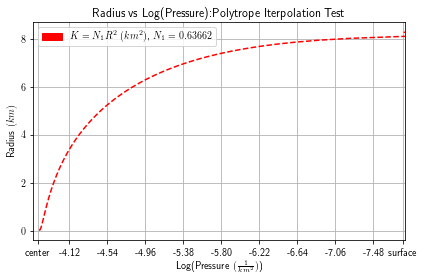

In [21]:
# # mpl.rc('text', usetex = True)
# plt.title("Radius vs Log(Pressure): EoS-A")
# plt.plot(np.log10(p_eosa[::-1]), r_array[:],'r--')
# plt.xlabel(r'Pressure $(\frac{1}{km^2})$',fontweight ='bold')
# plt.ylabel(r'Radius $(km)$',fontweight ='bold')
# # plt.xlabel('Radius $1/km^{2}$',fontweight ='bold')
# plt.xscale('linear')
# ax = plt.gca()
# plt.xticks([-25,-20.88,-16.76,-12.64,-8.52,-4.4],
#           [r'surface','-20.8','-16.8','-12.6','-8.5', r'center'])
# # plt.ylabel(r'Pressure $\frac{1}{km^2}$',fontweight ='bold')
# # plt.ylabel(r'Pressure $1/km^{2}$',fontweight ='bold')
# red_patch = mpatches.Patch(color='red', label='$h_{c}=1.2\cdot 10^{-1} $')
# plt.legend(handles=[red_patch])
# plt.tight_layout()
# plt.grid(True)
# plt.savefig("RvP_test.png")
# plt.show()
# p_eosa[::-1] = p_eosa

mpl.rc('text', usetex = True)
plt.title("Radius vs Log(Pressure):Polytrope Iterpolation Test",fontweight='bold')
plt.plot(np.log10(p_eosa[:]), r_array[:],'r--')
# plt.xlabel('Radius (km)',fontweight='bold')
# plt.ylabel('Pressure $1/km^{2}$',fontweight='bold')
plt.xlim(-3.72,-7.83)
ax = plt.gca()
plt.xticks([-3.77,-4.12,-4.54,-4.96,-5.38,-5.80,-6.22,-6.64,-7.06,-7.48,-7.81],
          [r'center','-4.12','-4.54','-4.96','-5.38','-5.80','-6.22','-6.64','-7.06','-7.48', r'surface'])
plt.xlabel(r'Log(Pressure $(\frac{1}{km^2})$)',fontweight ='bold')
plt.ylabel(r'Radius $(km)$',fontweight ='bold')
red_patch = mpatches.Patch(color='red', label='$K=N_{1}R^2$ $(km^{2})$, $N_{1}=0.63662$')
plt.legend(handles=[red_patch])
plt.tight_layout()
plt.grid(True)
plt.savefig("PvRtest.png")
plt.show

# plt.title("Radius v Log(Enthalpy) test")
# plt.plot(np.log(h_eosa[::-1]),r_array[:],'r--')
# plt.xlabel('Log(Enthalpy)')
# plt.xscale('log')
# plt.ylabel('Radius (km)')
# red_patch = mpatches.Patch(color='red', label='Radius')
# plt.legend(handles=[red_patch])
# plt.tight_layout()
# plt.grid(True)
# plt.savefig("Radius v LogEnthalpy test.png")
# plt.close()


In [22]:

# print('K',k)
print('initial radius:',rsq1)
print('initial mass:',msmallr1)
# print('gamma:',gam)
print('pressure at center:',pc)
print('energy density at center:',ec)
print('Enthalpy at center:',hc)


print('Radius = ', r_array[-1])
print('Mass = ', m_array[-1])

print('correct mass = 0.767827')
print('correct radius = 8.2307')

#print(' difference mass =', 100* (1- 0.755639934815/0.767827),'%')
#print(' difference radius =',100* (1- 8.36350249587/8.2307),'%')

initial radius: 0.00044162252853693917
initial mass: 6.309986564306223e-08
pressure at center: 0.00016772827043702574
energy density at center: 0.001623166217292098
Enthalpy at center: 0.196673023904
Radius =  8.262860201408126
Mass =  0.7482643345668081
correct mass = 0.767827
correct radius = 8.2307


In [23]:

# plt.title("Radius v Log(Enthalpy)test")
# plt.plot(np.log(h_eosa[::-1]),r_array[:],'r--')
# plt.xlabel('Log(Enthalpy)')
# plt.xscale('log')
# plt.ylabel('Radius (km)')
# red_patch = mpatches.Patch(color='red', label='Radius')
# plt.legend(handles=[red_patch])
# plt.tight_layout()
# plt.grid(True)
# plt.savefig("Radius v LogEnthalpy_test.png")
# plt.close()

In [24]:
# plt.title("Mass v Log(Enthalpy)test")
# plt.plot(np.log(h_eosa[::-1]),m_array[:],'k--')
# plt.xlabel('Log(Enthalpy)')
# plt.xscale('log')
# plt.ylabel('Radius (km)')
# red_patch = mpatches.Patch(color='red', label='Radius')
# plt.legend(handles=[red_patch])
# plt.tight_layout()
# plt.grid(True)
# plt.savefig("Mass v LogEnthalpy_test.png")
# plt.close()